## Traffic Density Analysis on A50 Route

In this notebook, we'll analyze and visualize the traffic density on the A50 route.

### Data Loading and Preprocessing

First, we load the dataset from the provided CSV file. We then filter the data to focus only on the A50 route. Subsequent preprocessing steps include converting the 'DatumFileBegin' column to a datetime format for easier analysis and converting the 'FileZwaarte' column to a numeric format after replacing commas with dots.

In [1]:
import pandas as pd

# Load the data 111111111111111111122222222222222222222
df = pd.read_csv("../../../Data/trafficDataA50/2022TrafficData.csv")
# Filter for A50 route
filtered_df = df[df['RouteOms'] == 'A50']
# Convert columns to appropriate data types
filtered_df["DatumFileBegin"] = pd.to_datetime(filtered_df["DatumFileBegin"])
filtered_df["FileZwaarte"] = filtered_df["FileZwaarte"].str.replace(',', '.').astype(float)

C:\Users\laure\AppData\Local\Temp\ipykernel_5900\4266541669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["DatumFileBegin"] = pd.to_datetime(filtered_df["DatumFileBegin"])
C:\Users\laure\AppData\Local\Temp\ipykernel_5900\4266541669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["FileZwaarte"] = filtered_df["FileZwaarte"].str.replace(',', '.').astype(float)


### Grouping and Filtering Data for Visualization

To prepare the data for visualization, we need to group it by date and sum the traffic density values for each day. This gives us a daily aggregate of traffic density. We then filter this aggregated data to focus on specific periods. In this section, we filter the data to obtain values for the entire month of October 2022 and specifically for the first week of October 2022.

In [2]:
# Group data by date and sum the traffic density
grouped_data = filtered_df.groupby("DatumFileBegin")["FileZwaarte"].sum()
# Filter data for October 2022
october_data = grouped_data[grouped_data.index.month == 10]
october_data = october_data[october_data.index.year == 2022]
# Filter data for the first week of October 2022
first_week_october = october_data[(october_data.index.day >= 1) & (october_data.index.day <= 7)]

### Visualization Function

To avoid redundancy in our code and to make our visualizations consistent, we define a function called 'plot_traffic_density'. This function takes in the data to be plotted, a title for the plot, and the number of ticks to be displayed on the x-axis. The function then generates a line plot with markers, providing a visual representation of traffic density over time.

In [3]:
import matplotlib.pyplot as plt

def plot_traffic_density(data, title, num_ticks):
    plt.figure(figsize=(15, 7))
    data.plot(marker='o', linestyle='-')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=num_ticks))
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Traffic Density (FileZwaarte)")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

### Traffic Density for the Entire Dataset

In this section, we visualize the traffic density for the entire dataset. This gives us an overview of the traffic patterns on the A50 route over the entire timeframe provided in the dataset.

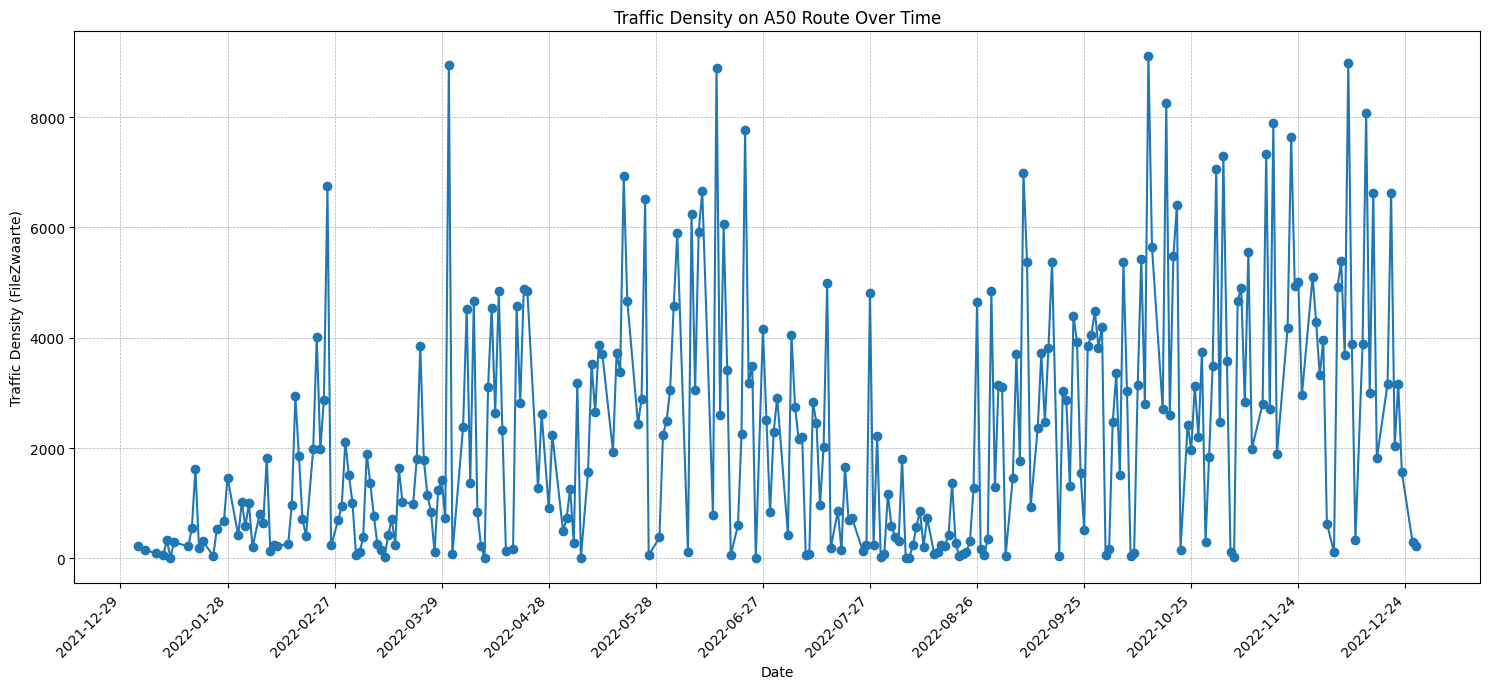

In [4]:
plot_traffic_density(grouped_data, "Traffic Density on A50 Route Over Time", 15)

### Traffic Density for October 2022

Here, we focus on the traffic density for the month of October 2022. By narrowing down our analysis to a specific month, we can observe any special traffic patterns or anomalies that might occur within that month.

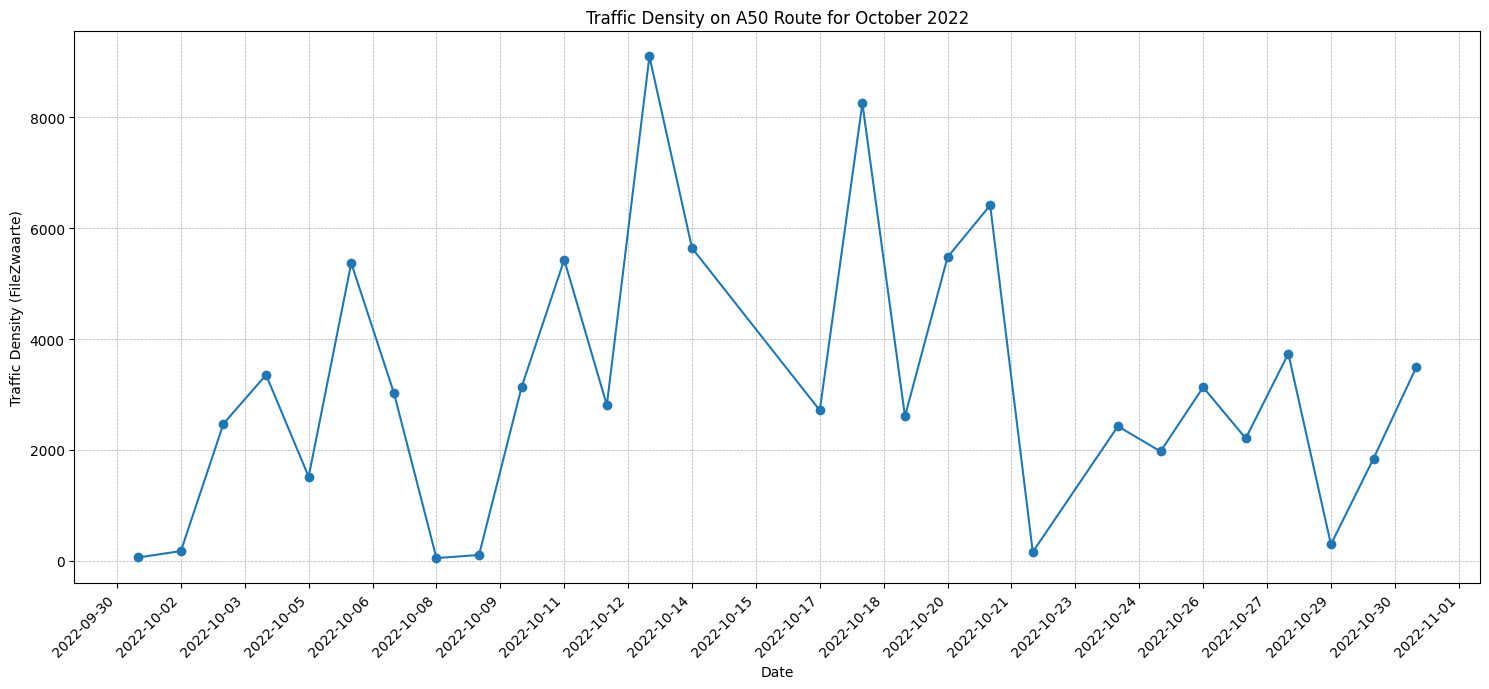

In [5]:
plot_traffic_density(october_data, "Traffic Density on A50 Route for October 2022", len(october_data))

### Traffic Density for the First Week of October 2022

In this final visualization, we narrow our focus even further to just the first week of October 2022. This allows us to observe daily traffic patterns in detail, identifying any specific days with unusually high or low traffic density.

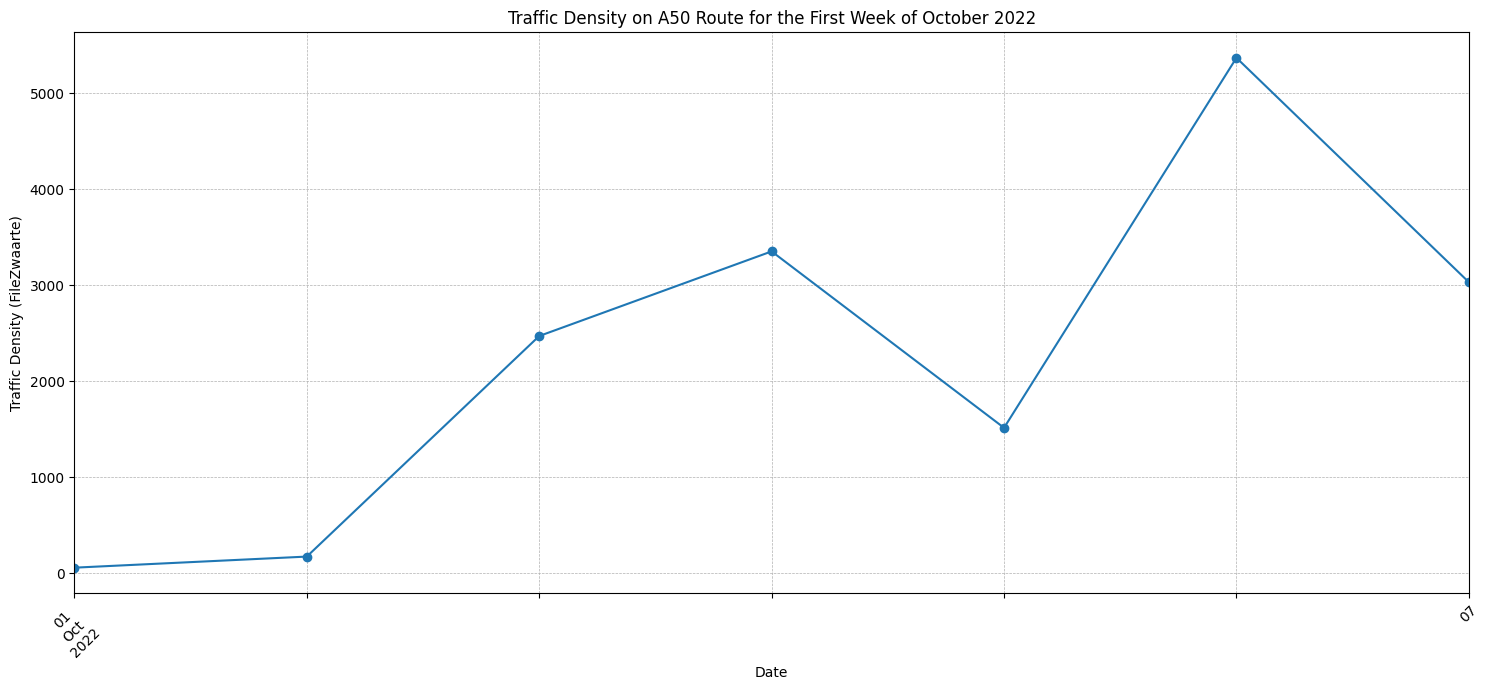

In [6]:
plot_traffic_density(first_week_october, "Traffic Density on A50 Route for the First Week of October 2022", len(first_week_october))